# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [13]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [14]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [15]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [16]:
batch_size = 16

In [17]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=False, batch_size=batch_size)

## Hiển thị một vài ví dụ

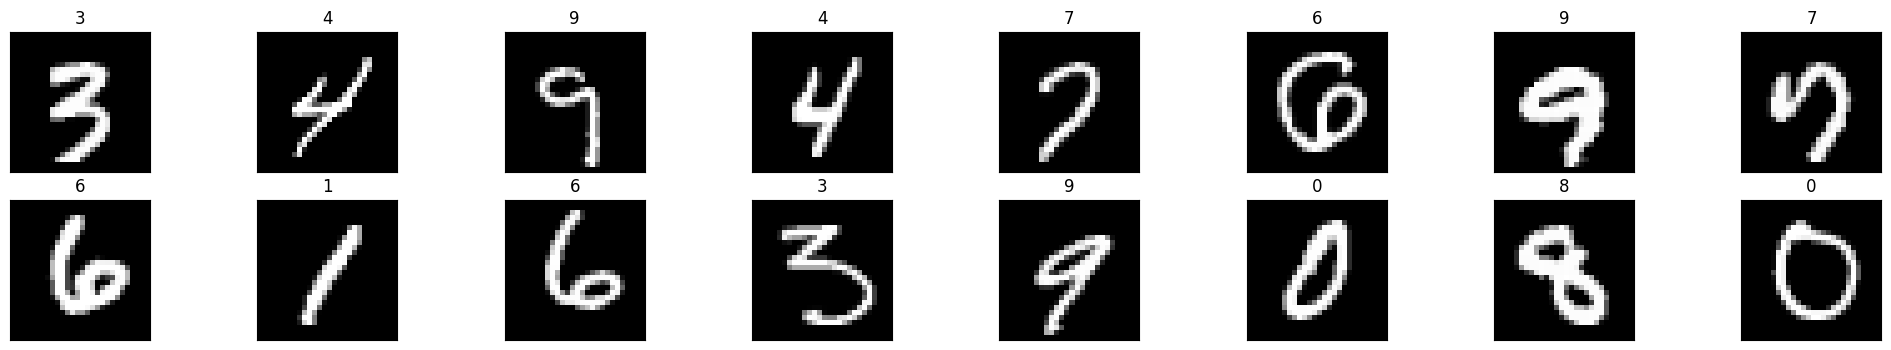

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
    
dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size // 2, idx + 1, xticks=[], yticks=[])
    # reshape từ (784,) về (28, 28)
    ax.imshow(np.reshape(images[idx], (28, 28)), cmap='gray')
    ax.set_title(str(labels[idx].item()))
plt.show()

In [22]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.output = nn.Linear(n_hidden_2, num_classes)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # add hidden layer, with relu activation function
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        x = self.softmax(x)
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [23]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def accuracy(model, testloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [ ]:
losses = []
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy(model, testloader)))

print('Finished Training')

Iteration: 10, accuracy: 0.925
Finished Training


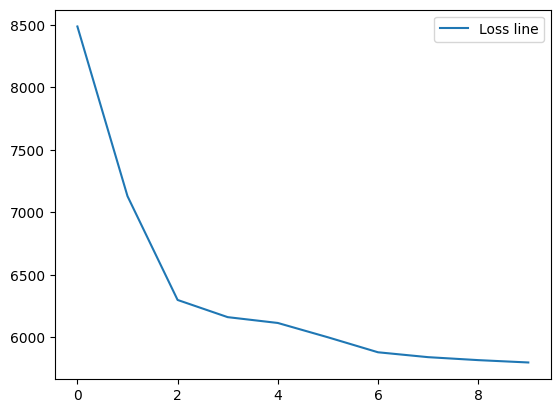

In [26]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.



In [ ]:
def train(epoches):
    losses = []
    for epoch in range(epoches):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

        # zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # print statistics
            running_loss += loss.item()
        losses.append(running_loss)
        if epoch % 10 == 9:
            print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Finished Training


In [29]:
train(50)

Iteration: 10, accuracy: 0.943
Iteration: 20, accuracy: 0.954
Iteration: 30, accuracy: 0.962
Iteration: 40, accuracy: 0.966
Iteration: 50, accuracy: 0.968


In [30]:
train(100)

Iteration: 10, accuracy: 0.970
Iteration: 20, accuracy: 0.969
Iteration: 30, accuracy: 0.971
Iteration: 40, accuracy: 0.972
Iteration: 50, accuracy: 0.972
Iteration: 60, accuracy: 0.972
Iteration: 70, accuracy: 0.972
Iteration: 80, accuracy: 0.972
Iteration: 90, accuracy: 0.973
Iteration: 100, accuracy: 0.973




*   Hiển thị một số kết quả



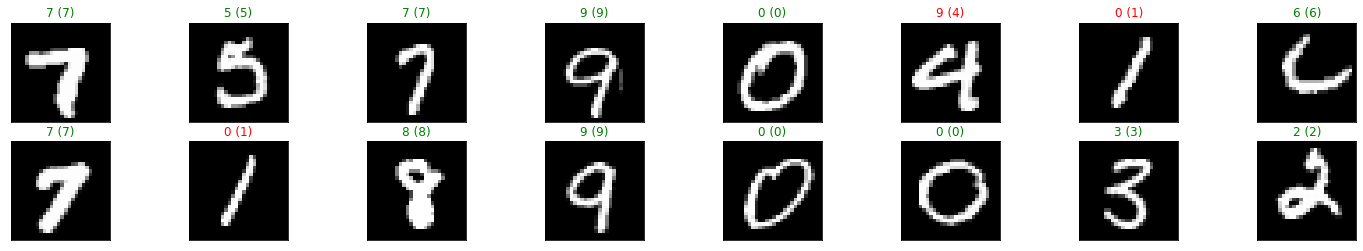

In [ ]:
# obtain one batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Bài tập

*   Thiết lập thêm 3 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**. 
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



In [3]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [38]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, random_state=42)
# Chuyển đổi sang định dạng float32.
x_train, x_dev, x_test = np.array(x_train, np.float32), np.array(x_dev, np.float32),np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_dev, x_test = x_train / 255.0, x_dev/255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28*28)
x_dev = x_dev.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

batch_size = 16

x_train, x_dev, x_test, y_train,y_dev, y_test = torch.from_numpy(x_train), torch.from_numpy(x_dev),torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_dev).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

# Tạo Dataset hiệu quả
train_dataset = TensorDataset(x_train, y_train)
dev_dataset = TensorDataset(x_dev, y_dev)
test_dataset = TensorDataset(x_test, y_test)

# Tạo DataLoader từ Dataset
trainloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
devloader = DataLoader(dev_dataset, shuffle=False, batch_size=batch_size)
testloader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [39]:
def accuracy(model, testloader):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [40]:
def train_mlp(model, trainloader, testloader, epoches, lr):

    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(epoches):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
        # zero the parameter gradients
            optimizer.zero_grad()
        # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        # print statistics
            running_loss += loss.item()
        losses.append(running_loss)
        if epoch % 10 == 9:
            print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy(model, testloader)))
    print('Finished Training')

In [41]:
class MLP1(nn.Module):
    def __init__(self, layer_sizes):
        super(MLP1, self).__init__()
        self.fc1 = nn.Linear(layer_sizes[0], layer_sizes[1])
        self.fc2 = nn.Linear(layer_sizes[1], layer_sizes[2])
        self.fc3 = nn.Linear(layer_sizes[2], layer_sizes[3])
        self.output = nn.Linear(layer_sizes[3], layer_sizes[4])

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.output(x)
        return x

In [55]:
class MLP2(nn.Module):
    def __init__(self, layer_sizes):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(layer_sizes[0], layer_sizes[1])
        self.fc2 = nn.Linear(layer_sizes[1], layer_sizes[2])
        self.fc3 = nn.Linear(layer_sizes[2], layer_sizes[3])
        self.fc4 = nn.Linear(layer_sizes[3], layer_sizes[4])
        self.output = nn.Linear(layer_sizes[4], layer_sizes[5])

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.output(x)
        return x

In [56]:
class MLP3(nn.Module):
    def __init__(self, layer_sizes):
        super(MLP3, self).__init__()
        self.fc1 = nn.Linear(layer_sizes[0], layer_sizes[1])
        self.fc2 = nn.Linear(layer_sizes[1], layer_sizes[2])
        self.fc3 = nn.Linear(layer_sizes[2], layer_sizes[3])
        self.fc4 = nn.Linear(layer_sizes[3], layer_sizes[4])
        self.fc5 = nn.Linear(layer_sizes[4], layer_sizes[5])
        self.output = nn.Linear(layer_sizes[5], layer_sizes[6])

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.output(x)
        return x

In [58]:
mlp1 = MLP1([784, 256, 128, 64, 10])
mlp2 = MLP2([784, 512, 256, 128, 64, 10])
mlp3 = MLP3([784, 512, 256, 128, 64, 32, 10])

In [45]:
train_mlp(mlp1, trainloader, devloader, 100, 0.1)
accuracy(mlp1, testloader)

Iteration: 10, accuracy: 0.978
Iteration: 20, accuracy: 0.983
Iteration: 30, accuracy: 0.983
Iteration: 40, accuracy: 0.983
Iteration: 50, accuracy: 0.983
Iteration: 60, accuracy: 0.983
Iteration: 70, accuracy: 0.983
Iteration: 80, accuracy: 0.983
Iteration: 90, accuracy: 0.983
Iteration: 100, accuracy: 0.983
Finished Training


0.9845

In [59]:
train_mlp(mlp2, trainloader, devloader, 100, 0.05)
accuracy(mlp2, testloader)

Iteration: 10, accuracy: 0.978
Iteration: 20, accuracy: 0.983
Iteration: 30, accuracy: 0.983
Iteration: 40, accuracy: 0.982
Iteration: 50, accuracy: 0.982
Iteration: 60, accuracy: 0.982
Iteration: 70, accuracy: 0.982
Iteration: 80, accuracy: 0.982
Iteration: 90, accuracy: 0.982
Iteration: 100, accuracy: 0.982
Finished Training


0.9838

In [60]:
train_mlp(mlp3, trainloader, devloader, 100, 0.001)
accuracy(mlp3, testloader)

Iteration: 10, accuracy: 0.213
Iteration: 20, accuracy: 0.876
Iteration: 30, accuracy: 0.937
Iteration: 40, accuracy: 0.959
Iteration: 50, accuracy: 0.963
Iteration: 60, accuracy: 0.965
Iteration: 70, accuracy: 0.967
Iteration: 80, accuracy: 0.967
Iteration: 90, accuracy: 0.967
Iteration: 100, accuracy: 0.967
Finished Training


0.9678